In [1]:
"""
#### Code adapted from the source code of ArtEmis dataset paper
"""

import json
import torch
import pandas as pd
import os.path as osp
import numpy as np
import itertools
from PIL import Image
from model.func_eval import unpickle_data,torch_load_model
from artemis.utils.vocabulary import Vocabulary #Use for text2emotion metrics
from artemis.evaluation.single_caption_per_image import apply_basic_evaluations
from artemis.emotions import IDX_TO_EMOTION
%load_ext autoreload
%autoreload 2

In [2]:
DBdir = "../Dataset/ArtEmis/ArtEmis"
modelname = 'CLIPViTB16_woSG' #'CLIPViTB16_full','CLIPViTB16_woSG','INRN34_full','INRN34_woSG','INViTB16_full','INViTB16_woSG'

model_dir = f'output/Ours_ArtEmis/{modelname}'
sampled_captions_file = osp.join(model_dir,'fullDB_test.pkl')

In [3]:
references_file = osp.join(DBdir,'Artemis_GT.pkl')
split = 'test'
gpu_id = 0

In [4]:
device = "cpu"
evaluation_methods = {'bleu', 'meteor', 'rouge', 'spice','cider'}
print(evaluation_methods) 

{'meteor', 'bleu', 'spice', 'cider', 'rouge'}


In [5]:
from model.count_IdC import count_IdC

In [6]:
print("Evaluating on ArtEmis...")
gt_data = next(unpickle_data(references_file))
train_utters = gt_data['train']['references_pre_vocab']
train_utters = list(itertools.chain(*train_utters))  # undo the grouping per artwork to a single large list
print('Training Utterances', len(train_utters))
unique_train_utters = set(train_utters)
gt_data = gt_data[split]
print('Images Captioned', len(gt_data))

saved_samples = next(unpickle_data(sampled_captions_file))
for sampling_config_details, captions in saved_samples:  # you might have sampled under several sampling configurations
    merged = pd.merge(gt_data, captions)  # this ensures proper order of captions to gt (via accessing merged.captions)
    merged['caption'] = merged.captions_predicted


Evaluating on ArtEmis...
Training Utterances 348197
Images Captioned 5497


79


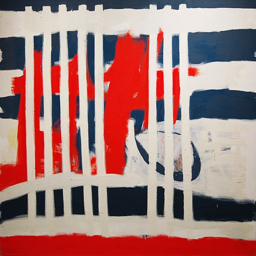

Generated caption: the red and white colors make me think of blood look like a prison flag 
Generated LC: the red and white contrast well with the black background 
Generated IdC: the red and white colors make me think of blood look like a prison flag 
Ground-truth captions: ['the writing in the back looks like blood', 'i do not really get what message it is supposed to be delivering but i do not like it it does not look like it was well thought out and its just not my cup of tea', 'the white bars look like prison bars holding a red entity in <unk> for a crime', 'makes me feel uneasy something about the white bars makes this look like a prison and the red are figures cloaked in secrecy was watching wind river where they said native americans are not <unk> <unk> towards missing persons that is what the red reminds me of missing native americans', 'the red white and blue makes me think of the great country in which i live', 'it looks like what someone on <unk> would see while staring at 

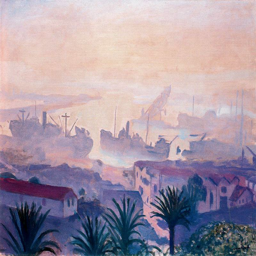

Generated caption: the colors are very pretty and the sky remind me of a sunset 
Generated LC: the pink and purple colors make this painting look very peaceful 
Generated IdC: the colors are very pretty and the sky remind me of a sunset 
Ground-truth captions: ['the soft colors remind me of a calm misty morning', 'the smoky cloudy skyline and crumbling buildings makes me think of a war scene', 'sun rise on the bay reminds me of my family trip to <unk>', 'the blue mixed with the peachy color of the morning fog in the painting makes me feel like this is a relaxing morning in which the world is just waking up', 'i love that the blurriness makes it look like a foggy morning in a spanish town its very beautiful for the senses and calming', 'the pinkish hues reminds me of a relaxing sunset', 'the rosy blanket of dawn is covering a small town and some boats in the bay making the scene feel like a ghostly <unk> waiting to happen in the morning hush', 'the paleness of the background of the pain

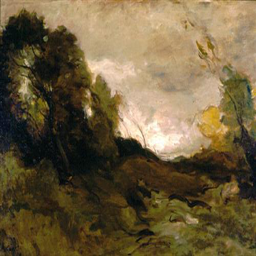

Generated caption: the dark colors and black of the painting looks like a storm brewing 
Generated LC: the dark colors and lack of color make this painting look very depressing 
Generated IdC: the dark colors and black of the painting looks like a storm brewing 
Ground-truth captions: ['the dark colors resemble a night time storm coming along', 'the colors are gloomy and the trees look like they are laying over like a storm went through and it looks as though there are snakes crawling all over toward the bottom', 'the angle of the trees makes it look like it is the middle of a wind storm', 'the vegetation looks like it is being tormented by strong wind', 'the dark shading the way the trees bend and the dark clouds in the distance makes it look like the beginning of a bad storm', 'the burnt out and malformed dirt reminds me of areas hit by <unk>', 'this reminds me of a peaceful summer rain shower since the sky is gray and the grass and plants are so green', 'the wind looks like it is bl

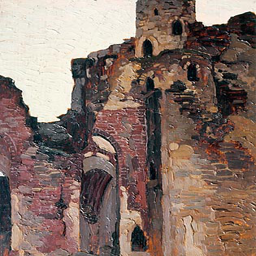

Generated caption: the red and brown colors make it look like a castle 
Generated LC: the colors are dark and the scene is very drab 
Generated IdC: the red and brown colors make it look like a castle 
Ground-truth captions: ['the dilapidated building feels like the remains of a terrible war', 'it looks like an old stone building that would be very cozy to be in', 'this painting looks like an ancient town or a town in spain and i really enjoyed studying these subjects in college', 'the slightly surreal style of the building makes me feel uneasy particularly the parts toward the middle that look like they are melting', 'the paint strokes look like the scales of a snake', 'this looks like a dwelling that hold many mysteries', 'looks like a ruin and those make me think about where the people went and why', 'the broken down wall looks like ruins of a once great city <unk>', 'this painting looks like an old castle on a hill side', 'i feel as though i am seeing an amazing piece of vintage ar

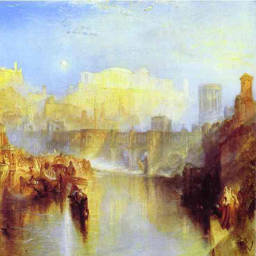

Generated caption: the yellow and blue sky make it look like a dream 
Generated LC: the sun is shining down the water and sky 
Generated IdC: the yellow and blue sky make it look like a dream 
Ground-truth captions: ['the yellow glow in the background makes this seem like a holy place', 'the historical bridge seen in the background reminds me of the serene life in ancient times', 'not something i had normally like but this has a bit of a mystical feel the hint of mist the way the ancient city in the background seems to be floating above the aqueducts', 'the setting terrain and foggy colors of this scene make me feel like i am about to go on a grand adventure almost like in a tom cruise movie or a video game like <unk> <unk>', 'i love the yellow glow of the buildings in the distance on what looks like venice', "the water and the arches of the bridge remind me of the city of <unk> from `` lord of the rings ''", 'still water and the sky looks like a warm summer day', 'the glowing gold sky

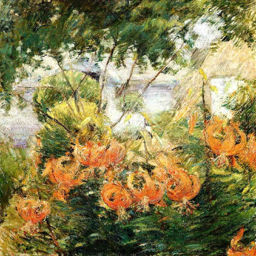

Generated caption: the bright colors and yellow colors make it look like a fire 
Generated LC: the flowers are growing in the wind 
Generated IdC: the bright colors and yellow colors make it look like a fire 
Ground-truth captions: ['i love the orange flowers cause they look like people', 'the flowers look like brilliant balls of orange fire', 'the orange flowers look like reaching hands', 'i feel like in a dream as i see the orange blend in with the rest of the portrait', 'the red orange flowers makes me think about my childhood'] 

3935


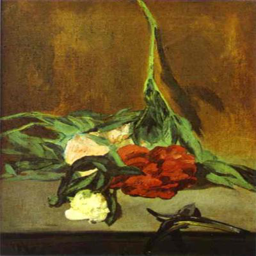

Generated caption: the flowers look like they are dying 
Generated LC: the flowers are very pretty and the colors are so dark 
Generated IdC: the flowers look like they are dying 
Ground-truth captions: ['with the bouquet being upside it makes me feel like someone has a broken heart and put them that way in sadness and disgust', 'reminds me of death the way the once freshly bloomed flower now seem to be wilting and drying', 'the black on the petals look like these flowers are <unk> to death than fresh', 'the upside down rose reminds me of death in nature and one day of morals as well', 'the colors of these flowers are especially nice though if they are flowers why are they upside down'] 

5202


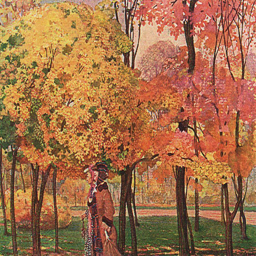

Generated caption: the colors are vivid and the leaves make it look like a sunset autumn day 
Generated LC: the colors are vibrant and the scene is very vibrant 
Generated IdC: the colors are vivid and the leaves make it look like a sunset autumn day 
Ground-truth captions: ['a beautiful painting presents the pleasant autumn with a great use of color', 'the golden and orange colors of the leaves next to the reds of the clothing feel very evocative of a crisp fall day i feel at ease and cozy seeing this painting', 'soft fall colors showed a relaxed mood', 'i like the image of the women walking in a park with brightly colored leaves on the trees', 'the details on the leaves changing colors on the trees'] 

3932


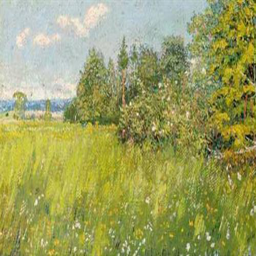

Generated caption: the bright colors and grass make it look like a nice spring place to spend a beautiful day 
Generated LC: the field is quite lovely and the green field looks untouched by the flowers 
Generated IdC: the bright colors and grass make it look like a nice spring place to spend a beautiful day 
Ground-truth captions: ['this field looks like a perfect place for a picnic', 'the green tall grass and the forest are very calming reminds me of back home', 'the field of grasses looks like it ’ s covered by a lush green blanket', 'it looks like a very scenic and peaceful scene', 'the strokes on the field make it look like the wind is blowing it', 'the grass and trees remind me of pretty spring day', 'this meadow near a forest reminds me of a prominent scene from twilight where <unk> meets edward in the meadow', 'the grass looks like it has been swept up gently with a paintbrush', 'looks like the mountain top in summer where my beloved elk come to feed', 'this reminds me of the sp

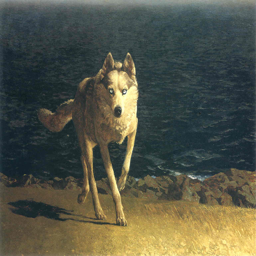

Generated caption: the dog looks like he is about to attack 
Generated LC: the dog looks very realistic and i like the way the colors used in the water 
Generated IdC: the dog looks like he is about to attack 
Ground-truth captions: ['the dog looks scary like it is dead and is a zombie', 'want to know why the wolf is running', 'the details of the animal show a powerful beast', 'the wolf is coming towards the front with its scary <unk> eyes', 'wolves are very mysterious creatures this painting gives me that sense and is a great representation'] 

5469


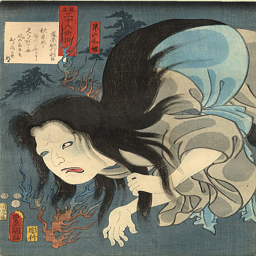

Generated caption: the woman looks like she is angry and the way her eyes are in pain 
Generated LC: the woman 's face is very distressed and the colors are dark 
Generated IdC: the woman looks like she is angry and the way her eyes are in pain 
Ground-truth captions: ['this painting has a lot to process the woman in the painting looks like she is in great pain and that her hair is also on fire to some extent', 'the lines and detail are sublime but the facial expression makes me think of mental illness', 'the uneven facial features make the figure seem like a monster', 'the differently colored eyes seem like the figure is ill', 'the crippled <unk> woman bent over while carrying a heavy load makes me angry'] 

5475


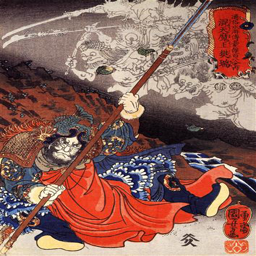

Generated caption: the man looks like he is about to fight 
Generated LC: the man is fighting and the dragon is scary 
Generated IdC: the man looks like he is about to fight 
Ground-truth captions: ['the expressions on the faces look quite violent and the man looks as if he is about to fight the conflict in this piece is frightening', 'this wars seems to be battling the gods themselves and i find the painting to be vibrant and alive there is action in evidence', 'reminds me of ancient battles', 'looks like demons in the sky and i feel this old man is going to have a hard time fighting them off i think that he likely to meet a violent end', 'the fighting scene between samurai and the spirits give me chills'] 



In [7]:
img_dir = '../Dataset/ArtEmis/OriginalArtEmis/wikiart/'
for random_id in [79, 3382, 3888, 4241,5085,2395, 3935,5202, 3932,1053, 5469, 5475]:
    print(random_id)
    row = merged.iloc[random_id]
    img_file = osp.join(img_dir, row['art_style'], row['painting'] + '.jpg')
    image = Image.open(img_file).resize((256, 256))
    display(image)
    print("Generated caption:",row['captions_predicted'],
          "\nGenerated LC:",row['LC_predicted'],
          "\nGenerated IdC:",row['IdC_predicted'],
          "\nGround-truth captions:",row['references'],"\n") 

Evaluating on ArtEmis literal captions ...
4666


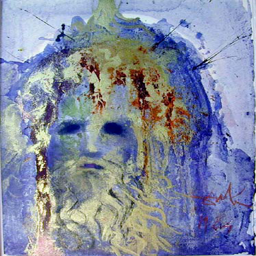

Generated caption: the man looks like a zombie is bleeding to be a lot of a scary 
Generated LC: the colors are very sad and the face is sad 
Generated IdC: the man looks like a zombie is bleeding to be a lot of a scary 
Ground-truth captions: ['this is like a ghost but comforting with the blues', 'i feel some sense of dread i recognize the general form to be christ i think but it looks so different than what i had normally think christ to look like that it leaves me feeling uneasy', 'the man looks like he has blood on his face and it looks scary', 'the figures pale blue face looks as if it has been frozen in ice', 'the person looks like a ghost or zombie from a horror film', 'i am sad to see the torture and what looks like blood all over the canvas', "the odd beard strands look like people growing out of the man 's face", 'the subject looks like the face of jesus with blood dripping down his face', 'the blank expression and lack of eyes portray this man as soulless and its feel is enh

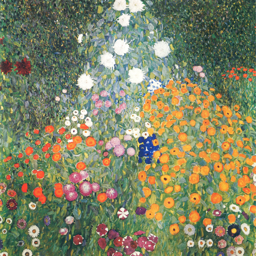

Generated caption: the bright colors and flowers remind me of a garden 
Generated LC: the flowers are very colorful and the colors are beautiful 
Generated IdC: the bright colors and flowers remind me of a garden 
Ground-truth captions: ['this serene field of flowers has many bright and vivid colors that flow so well together and makes you feel as though you are in another world', 'the bright colors on the flowers look like a happy spring day', 'i am not liking the lack of talent here i do not like the lack of detail that was put into the flowers the measurements seem to be too off', 'this feels like a warm sunny day in a garden surrounded by the gentle perfume of flowers', 'it is a field of flowers with a nice range of color with nobody around this seems like it would be a nice area to relax and be carefree', 'it reminds me of an english garden full of flowers in bloom very cheerful', 'i feel joy looking at this painting the color in the leaves and grass bring an instant <unk> of <unk

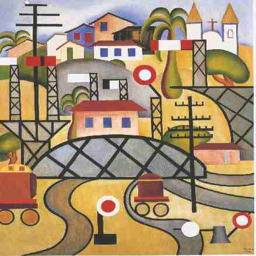

Generated caption: the bright colors and yellow colors make it look like a cartoon town 
Generated LC: the colors are bright and the shapes are very fun 
Generated IdC: the bright colors and yellow colors make it look like a cartoon town 
Ground-truth captions: ['the suppleness of the shapes used for the objects reminds me of toy cars and those rugs that are made to look like maps', 'it looks like a puzzle game that makes me think of it', 'makes me feel like i am looking at a newly built modern city in an old desert city', 'this piece reminds me of a childhood tv show with the bright colors and the rail carts and all the different traffic signs i love the block work to the city as if your expecting a cartoon train to come around the corner', 'i want to visit this town it looks like <unk> fun place', 'the simplified geometric shapes that are more representational than realistic make this scene seem childlike and fun which i find amusing', 'the building is too simple and relies largely o

In [8]:
merged = merged.sort_values(by=['painting'])
merged.reset_index(inplace=True, drop=True)
print("Evaluating on ArtEmis literal captions ...")
img_dir = '../Dataset/ArtEmis/OriginalArtEmis/wikiart/'
for random_id in [4666,1862,4854]:
    print(random_id)
    row = merged.iloc[random_id]
    img_file = osp.join(img_dir, row['art_style'], row['painting'] + '.jpg')
    image = Image.open(img_file).resize((256, 256))
    display(image)
    print("Generated caption:",row['captions_predicted'],
          "\nGenerated LC:",row['LC_predicted'],
          "\nGenerated IdC:",row['IdC_predicted'],
          "\nGround-truth captions:",row['references'],"\n") 

In [9]:
#fire, spring, prison, flower, cartoon, working hard, smoke, blood